# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [177]:
import os
import glob
import pandas as pd
os.chdir("c:\\Users\\Abdul Karim\\Desktop\\Ustacky\\Pandas-Analytics-Project") #Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [182]:
extension = 'csv'
csv_files = glob.glob('*.csv')

#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [183]:
all_cities_df = pd.concat(map(pd.read_csv, csv_files))
#Export to csv
all_cities_df.to_csv('All_Cities.csv')

#### To-Do -Read the CSV file using `pd.read_csv` method

In [184]:
df = pd.read_csv('All_Cities.csv')

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [186]:
df.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [187]:
df.shape

(1000, 18)

#### To-Do - Generate the names of the columns using the columns attribute.

In [188]:
df.columns

Index(['Unnamed: 0', 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [189]:
df.describe()

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,166.204000,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905,5536.572840,6.97270
std,96.337673,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,0.000000,4215.177173,1.71858
min,0.000000,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905,183.060000,4.00000
25%,83.000000,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905,2132.955000,5.50000
50%,166.000000,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905,4351.680000,7.00000
75%,249.250000,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905,8080.290000,8.50000
max,339.000000,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

##### Insights from the data statistical summary
- The .describe() method only works on columns containing numerical data
    We are able to compute the mean, standard deviation, minimum, percentiles and maximum of the columns because they
    are purely numerical
- Count being equal and 1000 for all columns
    The count being equal means that there are no missing values in our data
- The Quantity column
    This ranging from 1 to 10 means that the goods bought are always in that range
- Gross Margin Percentage
    Since the standard deviation is zero, this tells us that the data has no dispersion i.e. they are all equal

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [190]:
df.isnull().sum()

Unnamed: 0                 0
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   Invoice ID               1000 non-null   object 
 2   Branch                   1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cogs                     

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [192]:
import datetime as dt
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [193]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


#### To-Do - Repeat the two steps above to the `time` column

In [194]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Time
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [195]:
df['Day'] = df['Date'].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [197]:
df['Month'] = df['Date'].dt.month

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [198]:
df['Year'] = df['Date'].dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [199]:
df['Hour'] = df['Time'].dt.hour

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [200]:
df['Hour'].nunique()

11

In [201]:
df['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [202]:
#Uncomment the code and Run it
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [203]:
#Example - Uncomment the Code and Run it
df['Branch'].unique().tolist()

['B', 'A', 'C']

In [204]:
print("Total Number of unique values in the Branch Column : {}". format(len(df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [208]:
for i in range(2, len(categorical_columns)):
    print(categorical_columns[i], ':', df[categorical_columns[i]].unique().tolist(), '\n')

City : ['Abuja', 'Lagos', 'Port Harcourt'] 

Customer type : ['Member', 'Normal'] 

Gender : ['Female', 'Male'] 

Product line : ['Food and beverages', 'Fashion accessories', 'Electronic accessories', 'Sports and travel', 'Home and lifestyle', 'Health and beauty'] 

Payment : ['Card', 'Epay', 'Cash'] 



In [210]:
for i in range(2, len(categorical_columns)):
    print("Total Number of unique values in the {} Column : {}". format(categorical_columns[i], len(df[categorical_columns[i]].unique().tolist())))

Total Number of unique values in the City Column : 3
Total Number of unique values in the Customer type Column : 2
Total Number of unique values in the Gender Column : 2
Total Number of unique values in the Product line Column : 6
Total Number of unique values in the Payment Column : 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [211]:
#Example
df['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [212]:
for i in range(3, len(categorical_columns)):
    print(df[categorical_columns[i]].value_counts(), '\n')

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    501
Male      499
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64 



## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [213]:
df.groupby('City').agg(['sum', 'mean'])

Unnamed: 0        Unit price               Quantity            \
                     sum   mean        sum          mean      sum      mean   
City                                                                          
Abuja              54946  165.5  6652396.8  20037.339759     1820  5.481928   
Lagos              57630  169.5  6705176.4  19721.107059     1859  5.467647   
Port Harcourt      53628  163.5  6684393.6  20379.248780     1831  5.582317   

                   Tax 5%                     Total                 ...  \
                      sum         mean          sum           mean  ...   
City                                                                ...   
Abuja          1820531.52  5483.528675  38231161.92  115154.102169  ...   
Lagos          1820577.78  5354.640529  38232133.38  112447.451118  ...   
Port Harcourt  1895463.54  5778.852256  39804734.34  121355.897378  ...   

               Rating             Day            Month              Year  \
                  sum      mean   sum       mean   sum      mean     sum   
City                                                                       
Abuja          2263.6  6.818072  5068  15.265060   665  2.003012  670308   
Lagos          2389.2  7.027059  5232  15.388235   688  2.023529  686460   
Port Harcourt  2319.9  7.072866  4956  15.109756   640  1.951220  662232   

                       Hour             
                 mean   sum       mean  
City                                    
Abuja          2019.0  5029  15.147590  
Lagos          2019.0  4987  14.667647  
Port Harcourt  2019.0  4894  14.920732  

[3 rows x 26 columns]

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [214]:
df.groupby('City').sum()['gross income']

City
Abuja            1820531.52
Lagos            1820577.78
Port Harcourt    1895463.54
Name: gross income, dtype: float64

In [218]:
print('{} has the maximum gross income of {}'.format(df.groupby('City').sum()['gross income'].idxmax(), df.groupby('City').sum()['gross income'].max()))
# Port Harcourt has the maximum gross income of 1895463.54

Port Harcourt has the maximum gross income of 1895463.54


In [236]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 
print(df.groupby('City').sum()['Unit price'], '\n\n', 'Maximum:', '{} has the maximum unit price of {}'.format(df.groupby('City').sum()['Unit price'].idxmax(), df.groupby('City').sum()['Unit price'].max()), '\n')
print(df.groupby('City').sum()['Quantity'], '\n\n', 'Maximum:', '{} has the maximum quantity {}'.format(df.groupby('City').sum()['Quantity'].idxmax(), df.groupby('City').sum()['Quantity'].max()))

City
Abuja            6652396.8
Lagos            6705176.4
Port Harcourt    6684393.6
Name: Unit price, dtype: float64 

 Maximum: Lagos has the maximum unit price of 6705176.4 

City
Abuja            1820
Lagos            1859
Port Harcourt    1831
Name: Quantity, dtype: int64 

 Maximum: Lagos has the maximum quantity 1859


## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

Text(0.5, 1.0, 'Sales for each Branch')

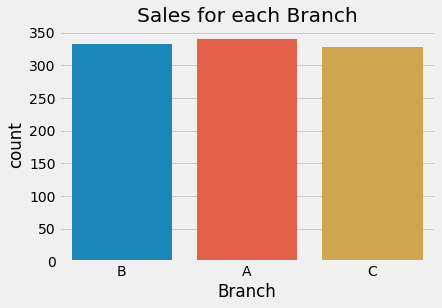

In [237]:
sns.countplot('Branch', data = df).set_title('Sales for each Branch')

#### Explore a countplot for the `Payment` and `City` Column

Text(0.5, 1.0, 'Sales for each Payment Method')

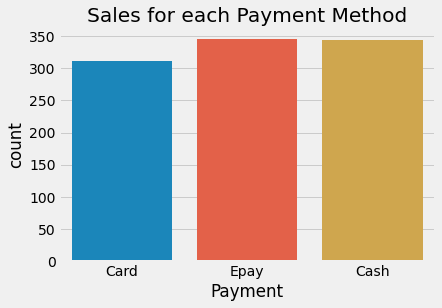

In [238]:
sns.countplot(x = 'Payment', data = df).set_title('Sales for each Payment Method')

Text(0.5, 1.0, 'Sales for each City')

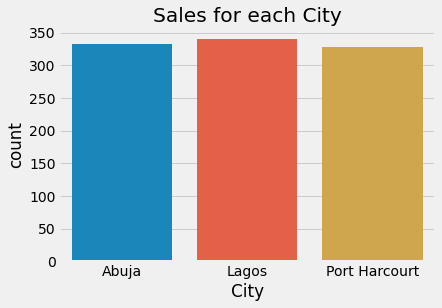

In [239]:
sns.countplot(x = 'City', data = df).set_title('Sales for each City')

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

Text(0.5, 1.0, 'Sales Record for each Product line')

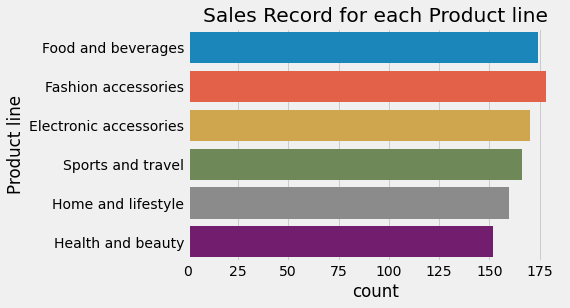

In [240]:
sns.countplot(y = 'Product line', data = df).set_title('Sales Record for each Product line')

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

Text(0.5, 1.0, 'Payment methods used for each Product line')

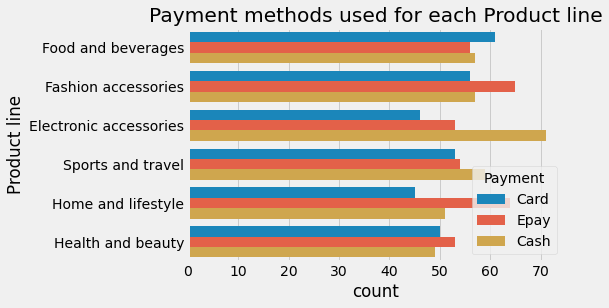

In [242]:
sns.countplot(y = 'Product line', hue = 'Payment', data = df).set_title('Payment methods used for each Product line')

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

Text(0.5, 1.0, 'Payment channel for each Branch')

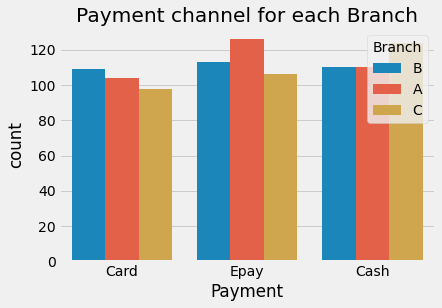

In [243]:
sns.countplot(x = 'Payment', hue = 'Branch', data = df).set_title('Payment channel for each Branch')

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

<AxesSubplot:xlabel='Rating', ylabel='Branch'>

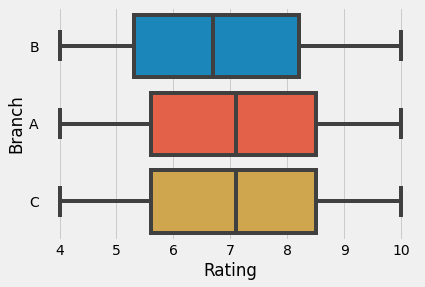

In [244]:
sns.boxplot(x = 'Rating', y = 'Branch', data = df)

In [245]:
# Reading from the plot, the lowest rating came from Branch B

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

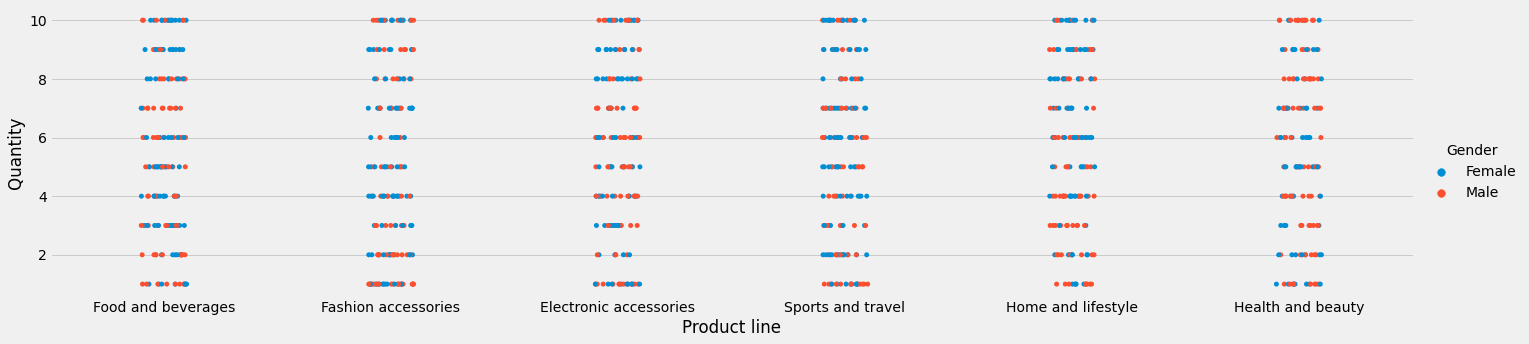

In [246]:
sns.catplot(x = 'Product line', y = 'Quantity', hue = 'Gender', data = df, aspect = 4)

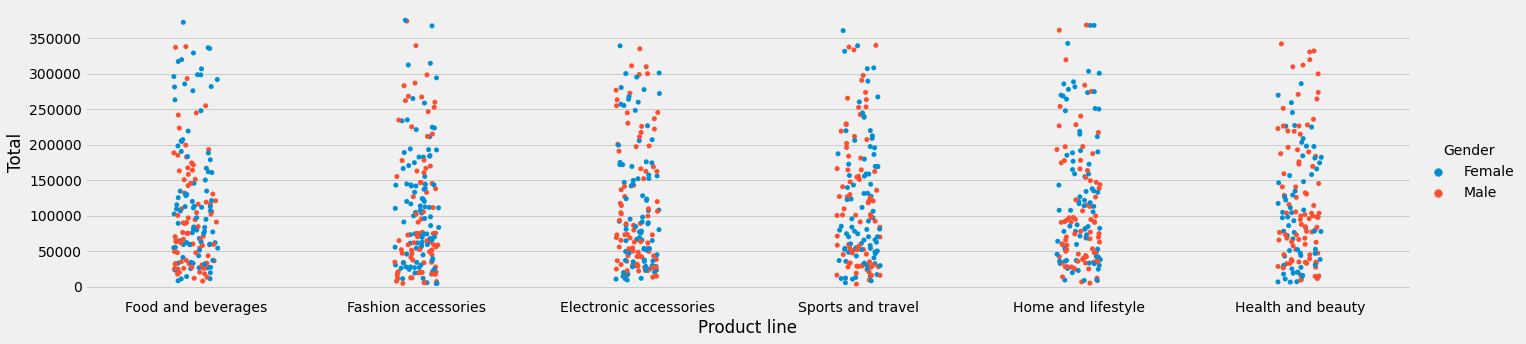

In [251]:
sns.catplot(x = 'Product line', y = 'Total', hue = 'Gender', data = df, aspect = 4)

In [254]:
# We can see that there is a higher density of blue dots indicating females on the 'Health and beauty' section, which makes sense considering
#  females generally patronize such products more than males.

# 'Food and bevereges', 'Fashion accessories' and 'Home and lifestyle' see the same trend as 'Health and beauty' but the opposite is true for 'Sports
#   and travel' as the orange dots are more popular there.


#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

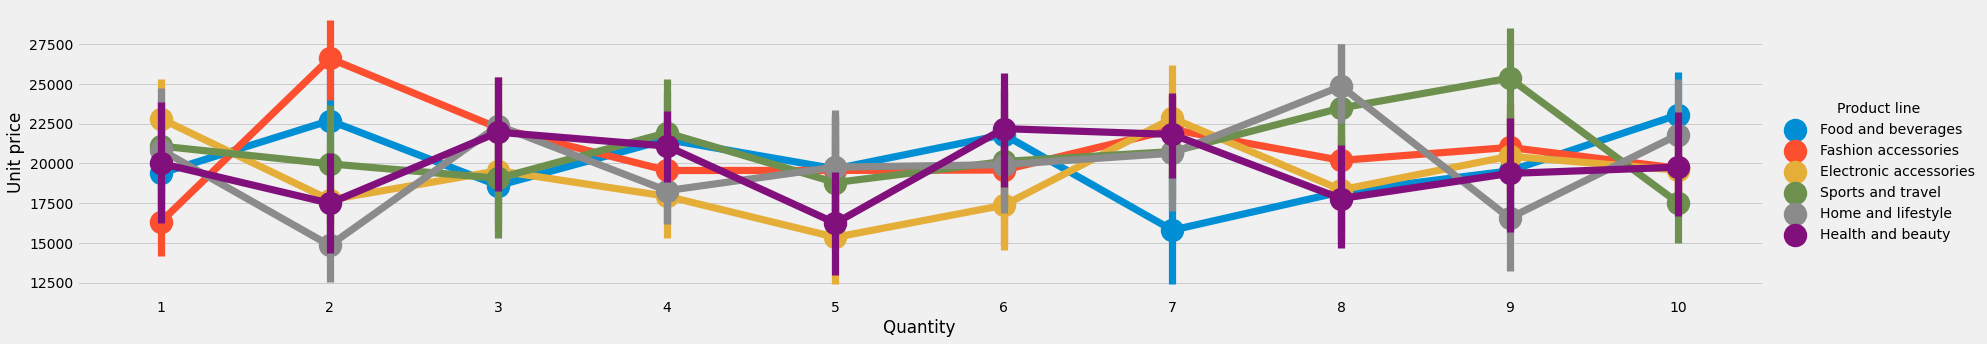

In [47]:
sns.catplot(x = 'Quantity', y = 'Unit price', hue = 'Product line', aspect = 5, data = df, kind = 'point')

In [43]:
# We observe that 'Food and beverages' products tend to bought more in bulk.
# We can also incur that 'Sport and travel' items are are generally not bought in a bulk manner.
# We also see that 'Electronic acessories' products are purchased in small quantities.
# All these insights reflect the trends in real peoples' purchasing activities.

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


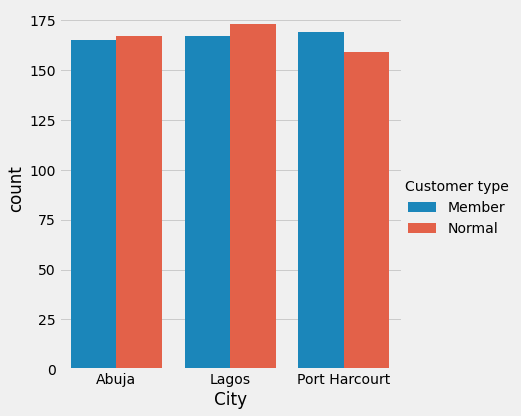

In [255]:
sns.catplot(x = 'City', hue = 'Customer type', height = 6, data = df, kind = 'count')

In [ ]:
# From the above plot, we can see that Company XYZ rakes in more regular (non member) customers from Lagos.
# Also, we see that their member customers are more populated in Port Harcourt.

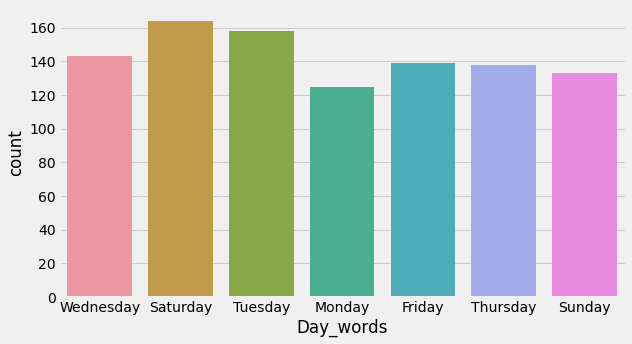

In [256]:
df['Day_words'] = df['Date'].apply(lambda x: x.strftime('%A'))
sns.catplot(x = 'Day_words', data = df, aspect = 1.8, kind = 'count')

In [257]:
# We can read from this that the Saturday, followed by Tuesday are the most popular days for shopping in Company XYZ's stores
# Also, Monday seems to be a less busy day at Company XYZ, presumably because it is the first day of a fresh week and everyone is busy at work

<AxesSubplot:xlabel='Customer type', ylabel='count'>

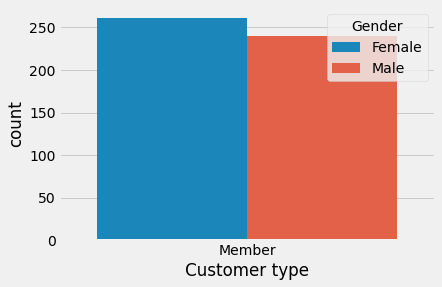

In [258]:
sns.countplot(x = 'Customer type', hue = 'Gender', data = df[df['Customer type'] == 'Member'])

In [259]:
# An interesting insight we get from this plot is that XYZ has more female customers

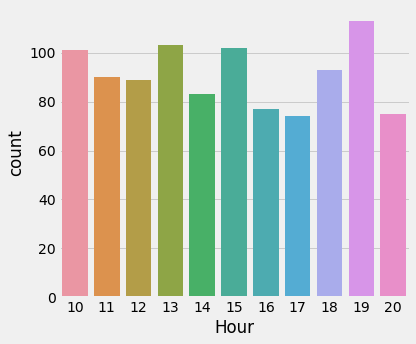

In [260]:
sns.catplot(x = 'Hour', data = df, kind = 'count', aspect = 1.2)

In [262]:
# We can observe from this plot that the highest amount of customers walk in to XYZ's stores at 19:00 or 7PM

# The least favorite time to go into the stores seems to be a tie between 17:00 or 5PM and 20:00 or 8PM

<AxesSubplot:xlabel='Rating', ylabel='Total'>

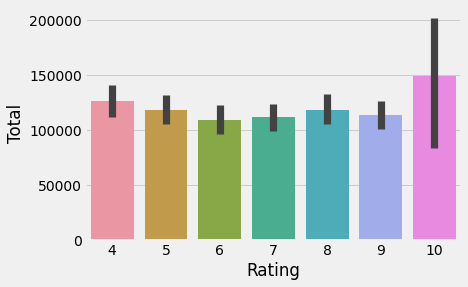

In [263]:
sns.barplot((df['Rating'].astype(int)), y = df['Total'])

In [264]:
# This plot simply tells us that the more a user enjoys XYZ's services (Rating), the more likely they are to spend more in the store.
# This is shown as a 10/10 rating rakes in the highest Total.

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 